# __MLflow - Tutorial__

## __Generator v.0__

### __Objective__

- Develop an exercise with MLflow to learn about this tool.

Paginas para revisar:

https://www.mlflow.org/
https://learn.microsoft.com/en-us/azure/databricks/_static/notebooks/mlflow/mlflow-model-registry-example.html
https://learn.microsoft.com/en-us/azure/databricks/mlflow/model-registry-example
https://medium.com/@haythemtellili/end-to-end-ml-pipelines-with-mlflow-projects-63a11baa2dd1
https://medium.com/@kevin.n.lu123/mlflow-managing-your-ml-pipeline-from-training-to-deployment-7e0d87df9d
https://crunchingthedata.com/cs01-mlflow-models/
https://medium.com/noodle-labs-the-future-of-ai/introduction-to-mlflow-for-mlops-part-1-anaconda-environment-1fd9e299226f
https://medium.com/noodle-labs-the-future-of-ai/introduction-to-mlflow-for-mlops-part-2-docker-environment-53516ce45266
https://medium.com/noodle-labs-the-future-of-ai/introduction-to-mlflow-for-mlops-part-3-database-tracking-minio-artifact-storage-and-registry-9fef196aaf42
https://kili-technology.com/blog/how-to-manage-your-machine-learning-pipeline-with-mlflow
https://analyticsindiamag.com/kubeflow-vs-mlflow-which-mlops-tool-should-you-use/

MLflow - Storing Artifacts in HDFS and in an SQLite DB: 
https://medium.com/@moyukh_51433/mlflow-storing-artifacts-in-hdfs-and-in-an-sqlite-db-7be26971b6ab

Cursos udemy:
https://www.udemy.com/course/azure-machine-learning-mlops-mg/

Youtube:
https://www.youtube.com/watch?v=wb-ZxtIwSTA
https://www.youtube.com/watch?v=JApPzAnbfPI
https://www.youtube.com/watch?v=SCwi3b29qwY


In [1]:
import numpy as np
import pandas as pd
import mlflow
import warnings
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
warnings.filterwarnings("ignore")

In [ ]:
#from pycaret.datasets import get_data
#from pycaret.classification import *

In [2]:
import sys
#sys.argv
print(sys.argv, len(sys.argv))

['C:\\Users\\jorgeantonio.lopez\\AppData\\Roaming\\Python\\Python38\\site-packages\\ipykernel_launcher.py', '--ip=127.0.0.1', '--stdin=9003', '--control=9001', '--hb=9000', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"435c8327-ee3e-4f00-bf0a-447b512f67a6"', '--shell=9002', '--transport="tcp"', '--iopub=9004', '--f=c:\\Users\\jorgeantonio.lopez\\AppData\\Roaming\\jupyter\\runtime\\kernel-v2-28788EnqQ54ug2wVF.json'] 11


Ejecutar en la terminal!!

* Environment (Pycaret_Challenge_Reviews)

In [4]:
# Ejecutar en terminal
# mlflow server --backend-store-uri sqlite:///tutorial_mlflow/mlflow_mtf.db --default-artifact-root ./tutorial_mlflow/mlflow-tensorflow

In [ ]:
import mlflow
from pathlib import Path

# Create an experiment name, which must be unique and case sensitive
experiment_id_tf = mlflow.create_experiment(
    "Tensorflow Experiments",
    artifact_location=Path.cwd().joinpath("tutorial_mlflow/mlflow-tensorflow").as_uri(),
    tags={"version": "v1", "priority": "P1"},
)

In [9]:
experiment_id_tf = "1"

In [10]:
experiment = mlflow.get_experiment(experiment_id_tf)
print("Name: {}".format(experiment.name))
print("Experiment_id: {}".format(experiment.experiment_id))
print("Artifact Location: {}".format(experiment.artifact_location))
print("Tags: {}".format(experiment.tags))
print("Lifecycle_stage: {}".format(experiment.lifecycle_stage))
print("Creation timestamp: {}".format(experiment.creation_time))

Name: Tensorflow Experiments
Experiment_id: 1
Artifact Location: file:///c:/Archivos%20Globant/Globant/Challenge/Challenge%20-%20NLP%20reviews/tutorial_mlflow/mlflow-tensorflow
Tags: {'version': 'v1', 'priority': 'P1'}
Lifecycle_stage: active
Creation timestamp: 1666912649854


# Eliminar un experimento de UI MLFLOW

In [6]:
# Enviar experimento a la carpeta de "trash"
# Fuente: https://mlflow.org/docs/latest/python_api/mlflow.html#mlflow.delete_experiment
import mlflow

#experiment_id = mlflow.create_experiment("New Experiment")
experiment_id = '1'
mlflow.delete_experiment(experiment_id)

# Examine the deleted experiment details.
experiment = mlflow.get_experiment(experiment_id)
print("Name: {}".format(experiment.name))
print("Artifact Location: {}".format(experiment.artifact_location))
print("Lifecycle_stage: {}".format(experiment.lifecycle_stage))
print("Last Updated timestamp: {}".format(experiment.last_update_time))

Name: Tensorflow Experiments
Artifact Location: file:///c:/Archivos%20Globant/Globant/Challenge/Challenge%20-%20NLP%20reviews/tutorial_mlflow/mlflow-tensorflow
Lifecycle_stage: deleted
Last Updated timestamp: 1666892990146


Tambien se tiene que eliminar de la base datos

* DELETE FROM experiments WHERE experiment_id = 1;
* DELETE FROM experiment_tags WHERE experiment_id = 1;

# Ejemplo de Red Neuronal

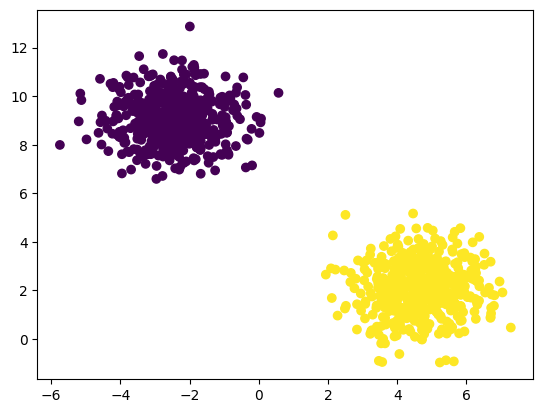

In [11]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X,y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=42)

plt.scatter(X[:,0], X[:, 1], c=y, marker="o")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
len(X_train.tolist())

670

In [14]:
from mlflow.tracking import MlflowClient
from mlflow.models.signature import infer_signature
client = MlflowClient()

In [15]:
import os
import warnings
import sys
import pandas as pd
import numpy as np
#import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import reuters
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from urllib.parse import urlparse
import mlflow
import mlflow.tensorflow

In [26]:
def print_auto_logged_info(r):
    tags = {k: v for k, v in r.data.tags.items() if not k.startswith("mlflow.")}
    artifacts = [f.path for f in MlflowClient().list_artifacts(r.info.run_id, "model")]
    print("run_id: {}".format(r.info.run_id))
    print("artifacts: {}".format(artifacts))
    print("params: {}".format(r.data.params))
    print("metrics: {}".format(r.data.metrics))
    print("tags: {}".format(tags))

def train_keras_model(X, y,learning_rates,optimizer,epochs,batch_size,validation_split):
  optimizer=keras.optimizers.Adam(learning_rate=learning_rates)

  model_anr = Sequential()
  model_anr.add(Dense(8, input_shape=(X_train.shape[-1],), activation="relu", name="hidden_layer"))
  model_anr.add(Dense(1,activation = "sigmoid"))
  model_anr.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["binary_accuracy"])

  history = model_anr.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

  fig, ax = plt.subplots(2,1)
  ax[0].plot(history.history['loss'], color='b', label="Training loss")
  ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['binary_accuracy'], color='b', label="Training binary accuracy")
  ax[1].plot(history.history['val_binary_accuracy'], color='r',label="Validation binary accuracy")
  legend = ax[1].legend(loc='best', shadow=True)

  test_loss, test_binary_accuracy = model_anr.evaluate(X_test, y_test)
  print("Test test_binary_accuracy: {}".format(test_binary_accuracy))

  mlflow.log_metric("test_loss", test_loss)
  mlflow.log_metric("test_binary_accuracy", test_binary_accuracy)
  return model_anr, history


Epoch 1/10
19/19 [==============================] - 1s 18ms/step - loss: 2.4930 - binary_accuracy: 0.5025 - val_loss: 2.2413 - val_binary_accuracy: 0.5224
Epoch 2/10
19/19 [==============================] - 0s 4ms/step - loss: 2.2250 - binary_accuracy: 0.5025 - val_loss: 2.0037 - val_binary_accuracy: 0.5224
Epoch 3/10
19/19 [==============================] - 0s 4ms/step - loss: 1.9937 - binary_accuracy: 0.5025 - val_loss: 1.7938 - val_binary_accuracy: 0.5224
Epoch 4/10
19/19 [==============================] - 0s 3ms/step - loss: 1.7880 - binary_accuracy: 0.5025 - val_loss: 1.6105 - val_binary_accuracy: 0.5224
Epoch 5/10
19/19 [==============================] - 0s 3ms/step - loss: 1.6056 - binary_accuracy: 0.5025 - val_loss: 1.4447 - val_binary_accuracy: 0.5224
Epoch 6/10
19/19 [==============================] - 0s 3ms/step - loss: 1.4387 - binary_accuracy: 0.5025 - val_loss: 1.2981 - val_binary_accuracy: 0.5224
Epoch 7/10
19/19 [==============================] - 0s 4ms/step - loss: 1.2

Registered model 'keras-modelo-1' already exists. Creating a new version of this model...
2022/10/28 13:53:22 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: keras-modelo-1, version 11
Created version '11' of model 'keras-modelo-1'.


run_id: 0833b88696e84efb99b4bf3cd4af80de
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/data', 'model/python_env.yaml', 'model/requirements.txt']
params: {'epochs': '10', 'batch_size': '32', 'validation_split': '0.1', 'shuffle': 'True', 'class_weight': 'None', 'sample_weight': 'None', 'initial_epoch': '0', 'steps_per_epoch': 'None', 'validation_steps': 'None', 'validation_batch_size': 'None', 'validation_freq': '1', 'max_queue_size': '10', 'workers': '1', 'use_multiprocessing': 'False', 'num_layers': '2', 'optimizer_name': 'Adam', 'learning_rate': '0.001', 'epsilon': '1e-07'}
metrics: {'loss': 0.9349945187568665, 'binary_accuracy': 0.5024875402450562, 'val_loss': 0.8440214991569519, 'val_binary_accuracy': 0.5223880410194397, 'test_loss': 0.91382896900177, 'test_binary_accuracy': 0.4909090995788574}
tags: {}


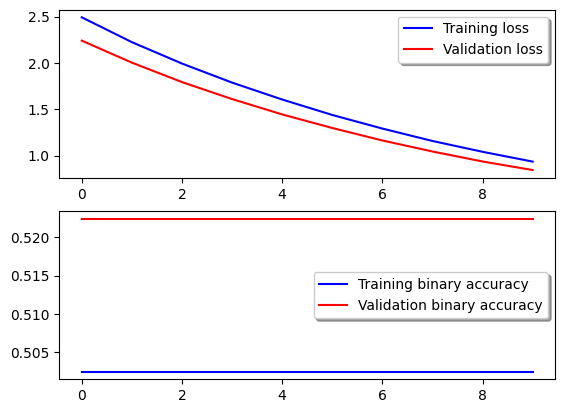

In [37]:
num_experiment = "Experiment 5"

if __name__ == "__main__":
    mlflow.set_tracking_uri("http://localhost:5000")
    warnings.filterwarnings("ignore")
    np.random.seed(40)
    
    mlflow.keras.autolog()
    #mlflow.autolog()
    #with mlflow.start_run(experiment_id=experiment_id_tf) as run:
    with mlflow.start_run(experiment_id=experiment_id_tf, run_name=num_experiment) as run:

          # Automatically capture the model's parameters, metrics, artifacts,
            # and source code with the `autolog()` function
            #mlflow.keras.autolog()

            mlflow.set_tag("mlflow.runName", num_experiment)

            learning_rates = 0.001
            optimizer=keras.optimizers.Adam(learning_rate=learning_rates)
            epochs = 10
            batch_size = 32
            validation_split = 0.1

            model_anr, history  = train_keras_model(X, y,learning_rates,optimizer,epochs,batch_size,validation_split)

            # get model signature
            signature = infer_signature(model_input=X_train, model_output=model_anr.predict(X_train))

            # Save the plot and log it as an artifact
            
            plt.savefig("behavior_plot.png")
            mlflow.log_artifact("behavior_plot.png")

            tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

            print('tracking_url_type_store:',tracking_url_type_store)

            #from tensorflow.python.saved_model import signature_constants
            #tag=[keras.saved_model.tag_constants.SERVING]
            #tag=[tensorflow.compat.v1.saved_model.tag_constants.SERVING]
            #key=signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY

            # Model registry does not work with file store
            if tracking_url_type_store != "file":

                # Register the model
                # There are other ways to use the Model Registry, which depends on the use case,
                # please refer to the doc for more information:
                # https://mlflow.org/docs/latest/model-registry.html#api-workflow
                # Save model to artifacts
                mlflow.keras.log_model(keras_model = model_anr, artifact_path='keras-models',signature=signature,
                registered_model_name="keras-modelo-1")
            else:
                # Save model to artifacts
                mlflow.keras.log_model(keras_model = model_anr, artifact_path="keras-models",signature=signature,
                registered_model_name="keras-modelo-1")
                #mlflow.keras.log_model()

# fetch the auto logged parameters and metrics for ended run
print_auto_logged_info(mlflow.get_run(run_id=run.info.run_id))

mlflow.end_run()


In [30]:
mlflow.end_run()

In [39]:
if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    np.random.seed(40)
    
    mlflow.autolog()
    #with mlflow.start_run(experiment_id=experiment_id_tf) as run:
    with mlflow.start_run(experiment_id=experiment_id_tf, run_name="Experiment 4") as run:

            mlflow.set_tag("mlflow.runName", "Experiment 4")
            epochs = 10
            batch_size = 32
            learning_rates = 0.001

            optimizer=keras.optimizers.Adam(learning_rate=learning_rates)

            # Log the model parameters used for this run.
            #mlflow.log_param("learning_rate", learning_rates)
            #mlflow.log_param("batch_size", batch_size)
            #mlflow.log_param("epochs", epochs)

            model = Sequential()
            model.add(Dense(8, input_shape=(2,), activation = "relu"))
            model.add(Dense(1,activation = "sigmoid"))
            model.compile(loss="binary_crossentropy" , optimizer=optimizer, metrics=["binary_accuracy"])

            history = model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)

           # log input features
            #mlflow.set_tag("features", str(X_train.columns.values.tolist()))

            #mlflow.log_metric("train_binary_accuracy", history.history['binary_accuracy'][-1])
            #mlflow.log_metric("val_binary_accuracy", history.history['val_binary_accuracy'][-1])
            #mlflow.log_metric("train_loss", history.history['loss'][-1])
            #mlflow.log_metric("val_loss", history.history['val_loss'][-1])

            fig, ax = plt.subplots(2,1)
            ax[0].plot(history.history['loss'], color='b', label="Training loss")
            ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
            legend = ax[0].legend(loc='best', shadow=True)

            ax[1].plot(history.history['binary_accuracy'], color='b', label="Training binary accuracy")
            ax[1].plot(history.history['val_binary_accuracy'], color='r',label="Validation binary accuracy")
            legend = ax[1].legend(loc='best', shadow=True)

            test_loss, test_binary_accuracy = model.evaluate(X_test, y_test)
            print("Test test_binary_accuracy: {}".format(test_binary_accuracy))

            mlflow.log_metric("test_loss", test_loss)
            mlflow.log_metric("test_binary_accuracy", test_binary_accuracy)

            # get model signature
            signature = infer_signature(model_input=X_train, model_output=model.predict(X_train))

            # Save the plot and log it as an artifact
            
            plt.savefig("behavior_plot.png")
            mlflow.log_artifact("behavior_plot.png")

            tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

            print('tracking_url_type_store:',tracking_url_type_store)

            mlflow.set_tracking_uri("http://localhost:5000")

            #from tensorflow.python.saved_model import signature_constants
            #tag=[keras.saved_model.tag_constants.SERVING]
            #tag=[tensorflow.compat.v1.saved_model.tag_constants.SERVING]
            #key=signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY

            # Model registry does not work with file store
            if tracking_url_type_store != "file":

                # Register the model
                # There are other ways to use the Model Registry, which depends on the use case,
                # please refer to the doc for more information:
                # https://mlflow.org/docs/latest/model-registry.html#api-workflow
                # Save model to artifacts
                mlflow.keras.log_model(keras_model = model, artifact_path='keras-models',signature=signature,
                registered_model_name="keras-modelo-1")
            else:
                # Save model to artifacts
                mlflow.keras.log_model(keras_model = model, artifact_path="keras-models",signature=signature,
                registered_model_name="keras-modelo-1")
                #mlflow.keras.log_model()

# fetch the auto logged parameters and metrics for ended run
print_auto_logged_info(mlflow.get_run(run_id=run.info.run_id))

mlflow.end_run()


2022/10/28 16:29:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2022/10/28 16:29:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2022/10/28 16:29:32 INFO mlflow.pyspark.ml: No SparkSession detected. Autologging will log pyspark.ml models contained in the default allowlist. To specify a custom allowlist, initialize a SparkSession prior to calling mlflow.pyspark.ml.autolog() and specify the path to your allowlist file via the spark.mlflow.pysparkml.autolog.logModelAllowlistFile conf.
2022/10/28 16:29:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.ml.


Epoch 1/10
19/19 [==============================] - 1s 15ms/step - loss: 0.1485 - binary_accuracy: 0.9983 - val_loss: 0.0999 - val_binary_accuracy: 1.0000
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 0.0870 - binary_accuracy: 1.0000 - val_loss: 0.0588 - val_binary_accuracy: 1.0000
Epoch 3/10
19/19 [==============================] - 0s 3ms/step - loss: 0.0563 - binary_accuracy: 1.0000 - val_loss: 0.0397 - val_binary_accuracy: 1.0000
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 0.0408 - binary_accuracy: 1.0000 - val_loss: 0.0293 - val_binary_accuracy: 1.0000
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 0.0318 - binary_accuracy: 1.0000 - val_loss: 0.0225 - val_binary_accuracy: 1.0000
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 0.0255 - binary_accuracy: 1.0000 - val_loss: 0.0180 - val_binary_accuracy: 1.0000
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 0.0

KeyboardInterrupt: 

In [ ]:
model_name = "keras-modelo-1"

# Delete versions 1,2, and 3 of the model
client = MlflowClient()
versions=[1, 2, 3]
for version in versions:
    client.delete_model_version(name=model_name, version=version)

# Delete a registered model along with all its versions
client.delete_registered_model(name="sk-learn-random-forest-reg-model")

In [ ]:
def print_auto_logged_info(r):
    tags = {k: v for k, v in r.data.tags.items() if not k.startswith("mlflow.")}
    artifacts = [f.path for f in MlflowClient().list_artifacts(r.info.run_id, "model")]
    print("run_id: {}".format(r.info.run_id))
    print("artifacts: {}".format(artifacts))
    print("params: {}".format(r.data.params))
    print("metrics: {}".format(r.data.metrics))
    print("tags: {}".format(tags))


In [19]:
experiment = mlflow.get_experiment('1')
print("Name: {}".format(experiment.name))
print("Artifact Location: {}".format(experiment.artifact_location))
print("Lifecycle_stage: {}".format(experiment.lifecycle_stage))
print("Experiment ID: {}".format(experiment.experiment_id))

Name: Tensorflow Experiments
Artifact Location: file:///c:/Archivos%20Globant/Globant/Challenge/Challenge%20-%20NLP%20reviews/tutorial_mlflow/mlflow-tensorflow
Lifecycle_stage: active
Experiment ID: 1


In [24]:
model_name = "keras-modelo-1"

# Importing MLflow in Python
import mlflow
# Initializing the MLflowClient
client = mlflow.tracking.MlflowClient()
# Transitioning the model into either Staging, Production, or Archived based on version number
client.transition_model_version_stage(name=model_name, version=1, stage="Production")


<ModelVersion: creation_timestamp=1666912972955, current_stage='Production', description='', last_updated_timestamp=1666914598763, name='keras-modelo-1', run_id='fcf1cca02ec24277bdeee5bb671acf33', run_link='', source='file:///c:/Archivos%20Globant/Globant/Challenge/Challenge%20-%20NLP%20reviews/tutorial_mlflow/mlflow-tensorflow/fcf1cca02ec24277bdeee5bb671acf33/artifacts/keras-models', status='READY', status_message='', tags={}, user_id='', version='1'>

In [23]:
os.path.dirname('C:/Archivos Globant/Globant/Challenge/Challenge - NLP reviews/mlflow.db')

'C:/Archivos Globant/Globant/Challenge/Challenge - NLP reviews'

In [30]:
import mlflow.pyfunc

model_name = "keras-modelo-1"
model_version = 1

model_pba = mlflow.pyfunc.load_model(f"models:/{model_name}/production")

pred_y = model_pba.predict(X_test)

# Sanity-check: This should match the AUC logged by MLflow
print(f"Predictions:\n {pred_y[0:10]}")

11/11 [==============================] - 0s 1ms/step
Predictions:
 [[0.9564974 ]
 [0.20105423]
 [0.79013395]
 [0.9609186 ]
 [0.17860295]
 [0.84820294]
 [0.18752398]
 [0.21403374]
 [0.20855944]
 [0.7554943 ]]


In [31]:
import mlflow.pyfunc

model_name = "keras-modelo-1"
model_version = 1

model_version_uri = "models:/{model_name}/production".format(model_name=model_name)

print("Loading registered model version from URI: '{model_uri}'".format(model_uri=model_version_uri))
model_version_1 = mlflow.pyfunc.load_model(model_version_uri)

pred_y = model_version_1.predict(X_test)

# Sanity-check: This should match the AUC logged by MLflow
print(f"Predictions:\n {pred_y[0:10]}")

Loading registered model version from URI: 'models:/keras-modelo-1/production'
11/11 [==============================] - 0s 999us/step
Predictions:
 [[0.9564974 ]
 [0.20105423]
 [0.79013395]
 [0.9609186 ]
 [0.17860295]
 [0.84820294]
 [0.18752398]
 [0.21403374]
 [0.20855944]
 [0.7554943 ]]


In [27]:
run.info.run_id

'fcf1cca02ec24277bdeee5bb671acf33'

In [28]:
# The second way is to use the mlflow.register_model() method, after all your experiment runs complete and when 
# you have decided which model is most suitable to add to the registry. For this method, you will need the run_id
# as part of the runs:URI argument.

model_name="keras-modelo-1"

result = mlflow.register_model(
    "runs:/fcf1cca02ec24277bdeee5bb671acf33/artifacts/keras-models",  #/production ????
    model_name
)

Registered model 'keras-modelo-1' already exists. Creating a new version of this model...
2022/10/27 18:51:48 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: keras-modelo-1, version 2
Created version '2' of model 'keras-modelo-1'.


### Eliminación Version 1del modelo de previsión de potencia
También puede usar la interfaz de usuario de MLflow o la API de MLflow para eliminar versiones del modelo. La eliminación de la versión del modelo es permanente y no se puede deshacer.

Las siguientes celdas proporcionan una referencia para eliminar Version 1el modelo de pronóstico de energía mediante la API de MLflow. Consulte la documentación sobre cómo eliminar una versión del modelo mediante la interfaz de usuario.

### Eliminar Version 1usando la API de MLflow

La siguiente celda elimina permanentemente Version 1del modelo de pronóstico de energía.

In [ ]:
model_name = "keras-modelo-1"

# Delete versions 1,2, and 3 of the model
client = MlflowClient()
versions=[1, 2, 3]
for version in versions:
    client.delete_model_version(name=model_name, version=version)


### Eliminar el modelo de pronóstico de energía
Si desea eliminar un modelo registrado completo, incluidas todas sus versiones de modelo, puede utilizar MlflowClient.delete_registered_model()para hacerlo. Esta acción no se puede deshacer. Primero debe realizar la transición de todas las etapas de la versión del modelo a Ninguno o Archivado .

**_Advertencia: La siguiente celda elimina permanentemente el modelo de pronóstico de energía, incluidas todas sus versiones._**

In [ ]:
model_name = "keras-modelo-1"

client.transition_model_version_stage(
  name=model_name,
  version=2,
  stage="Archived"
)
 
client.delete_registered_model(name=model_name)

In [ ]:
model_name = "keras-modelo-1"

# Delete a registered model along with all its versions
client.delete_registered_model(name=model_name)

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print(f"Loss: {score[0]}")
print(f"Accuracy: {score[1]}")

11/11 [==============================] - 0s 1ms/step - loss: 0.2002 - binary_accuracy: 0.9788
Loss: 0.20022185146808624
Accuracy: 0.978787899017334


In [26]:
run.info.run_id

'fcf1cca02ec24277bdeee5bb671acf33'

In [ ]:
# The data set used in this example is from http://archive.ics.uci.edu/ml/datasets/Wine+Quality
# P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
# Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

import os
import warnings
import sys

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn

import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)


import mlflow
from pathlib import Path

# Create an experiment name, which must be unique and case sensitive
experiment_id = mlflow.create_experiment(
    "Keras Experiments",
#    artifact_location=Path.cwd().joinpath("mlruns").as_uri(),
    tags={"version": "v1", "priority": "P1"},
)

experiment = mlflow.get_experiment(experiment_id)

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2


if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    np.random.seed(40)

    # Read the wine-quality csv file from the URL
    csv_url = (
        "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    )
    try:
        data = pd.read_csv(csv_url, sep=";")
    except Exception as e:
        logger.exception(
            "Unable to download training & test CSV, check your internet connection. Error: %s", e
        )

    # Split the data into training and test sets. (0.75, 0.25) split.
    train, test = train_test_split(data)

    # The predicted column is "quality" which is a scalar from [3, 9]
    train_x = train.drop(["quality"], axis=1)
    test_x = test.drop(["quality"], axis=1)
    train_y = train[["quality"]]
    test_y = test[["quality"]]

    #alpha = float(sys.argv[1]) if len(sys.argv) > 1 else 0.5
    #l1_ratio = float(sys.argv[2]) if len(sys.argv) > 2 else 0.5
    alpha= 0.5
    l1_ratio=0.5

    with mlflow.start_run(experiment_id=experiment_id):
        lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        lr.fit(train_x, train_y)

        predicted_qualities = lr.predict(test_x)

        (rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)

        print("Elasticnet model (alpha=%f, l1_ratio=%f):" % (alpha, l1_ratio))
        print("  RMSE: %s" % rmse)
        print("  MAE: %s" % mae)
        print("  R2: %s" % r2)

        mlflow.log_param("alpha", alpha)
        mlflow.log_param("l1_ratio", l1_ratio)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("mae", mae)

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":

            # Register the model
            # There are other ways to use the Model Registry, which depends on the use case,
            # please refer to the doc for more information:
            # https://mlflow.org/docs/latest/model-registry.html#api-workflow
            mlflow.sklearn.log_model(lr, "model", registered_model_name="ElasticnetWineModel", artifact_path='keras-model_1')
        else:
            mlflow.sklearn.log_model(lr, "model")


MlflowException: Experiment 'Keras Experiments' already exists.

In [ ]:
# The data set used in this example is from http://archive.ics.uci.edu/ml/datasets/Wine+Quality
# P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
# Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

import os
import warnings
import sys

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn

import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)


import mlflow
from pathlib import Path

# Create an experiment name, which must be unique and case sensitive
#experiment_id = mlflow.create_experiment(
#    "Keras Experiments",
#    artifact_location=Path.cwd().joinpath("mlruns").as_uri(),
#    tags={"version": "v1", "priority": "P1"},
#)

#experiment = mlflow.get_experiment(experiment_id)

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2


if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    np.random.seed(40)

    # Read the wine-quality csv file from the URL
    csv_url = (
        "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    )
    try:
        data = pd.read_csv(csv_url, sep=";")
    except Exception as e:
        logger.exception(
            "Unable to download training & test CSV, check your internet connection. Error: %s", e
        )

    # Split the data into training and test sets. (0.75, 0.25) split.
    train, test = train_test_split(data)

    # The predicted column is "quality" which is a scalar from [3, 9]
    train_x = train.drop(["quality"], axis=1)
    test_x = test.drop(["quality"], axis=1)
    train_y = train[["quality"]]
    test_y = test[["quality"]]

    #alpha = float(sys.argv[1]) if len(sys.argv) > 1 else 0.5
    #l1_ratio = float(sys.argv[2]) if len(sys.argv) > 2 else 0.5
    alpha= 0.5
    l1_ratio=0.5

    with mlflow.start_run(experiment_id=experiment_id):
        lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        lr.fit(train_x, train_y)

        predicted_qualities = lr.predict(test_x)

        (rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)

        print("Elasticnet model (alpha=%f, l1_ratio=%f):" % (alpha, l1_ratio))
        print("  RMSE: %s" % rmse)
        print("  MAE: %s" % mae)
        print("  R2: %s" % r2)

        mlflow.log_param("alpha", alpha)
        mlflow.log_param("l1_ratio", l1_ratio)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("mae", mae)

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":

            # Register the model
            # There are other ways to use the Model Registry, which depends on the use case,
            # please refer to the doc for more information:
            # https://mlflow.org/docs/latest/model-registry.html#api-workflow
            mlflow.sklearn.log_model(lr, "model", registered_model_name="ElasticnetWineModel", artifact_path='keras-model_1')
        else:
            mlflow.sklearn.log_model(lr, "model")


Elasticnet model (alpha=0.500000, l1_ratio=0.500000):
  RMSE: 0.7931640229276851
  MAE: 0.6271946374319587
  R2: 0.10862644997792614


In [ ]:
import mlflow
from pathlib import Path

# Create an experiment name, which must be unique and case sensitive
experiment_id = mlflow.create_experiment(
    "Social NLP Experiments",
    artifact_location=Path.cwd().joinpath("mlruns").as_uri(),
    tags={"version": "v1", "priority": "P1"},
)
experiment = mlflow.get_experiment(experiment_id)
print("Name: {}".format(experiment.name))
print("Experiment_id: {}".format(experiment.experiment_id))
print("Artifact Location: {}".format(experiment.artifact_location))
print("Tags: {}".format(experiment.tags))
print("Lifecycle_stage: {}".format(experiment.lifecycle_stage))
print("Creation timestamp: {}".format(experiment.creation_time))

Name: Social NLP Experiments
Experiment_id: 16
Artifact Location: file:///c:/Archivos%20Globant/Globant/Challenge/Challenge%20-%20NLP%20reviews/mlruns
Tags: {'priority': 'P1', 'version': 'v1'}
Lifecycle_stage: active
Creation timestamp: 1665532399736


In [ ]:
import mlflow
from pathlib import Path

In [ ]:
import numpy as np
#import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import reuters
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer
import mlflow.tensorflow


In [ ]:
import os
import warnings
import sys
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn

In [ ]:
#mlflow.tensorflow.autolog(registered_model_name='', log_input_examples=True)
#mlflow.tensorflow.autolog(every_n_iter=1, log_models=True, disable=False, exclusive=False, disable_for_unsupported_versions=False, 
#                          silent=False, registered_model_name=None, log_input_examples=False, log_model_signatures=False)


### Serve model using MLFlow from registry
* https://stackoverflow.com/questions/70085888/serve-model-using-mlflow-from-registry

In [ ]:
# Ejecutar en Terminal
# mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./mlflow-artifact
# mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./artifacts
# mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./artifacts --host 0.0.0.0

# Ejecutar en notebook
# mlflow.set_tracking_uri('http://localhost:5000')

'export' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
mlflow server --backend-store-uri sqlite:////root/example.db \
    --default-artifact-root hdfs://localhost:9000/MlflowOutput \
    --host 0.0.0.0 ( or your server ip )
     -p 5000

In [ ]:
mlflow.set_tracking_uri('http://localhost:5000')

NameError: name 'mlflow' is not defined

In [ ]:
# Create an experiment name, which must be unique and case sensitive
experiment_id_tf = mlflow.create_experiment(
    "Tensorflow Experiments",
#    artifact_location=Path.cwd().joinpath("mlruns").as_uri(),
    tags={"version": "v1", "priority": "P1"},
)

#experiment = mlflow.get_experiment(experiment_id)

In [ ]:
mlflow.get_experiment(1)

<Experiment: artifact_location='./mlflow-artifact/1', creation_time=1665691658300, experiment_id='1', last_update_time=1665691658300, lifecycle_stage='active', name='Tensorflow Experiments', tags={'priority': 'P1', 'version': 'v1'}>

In [ ]:
experiment_1 = mlflow.get_experiment('1')
experiment_1

<Experiment: artifact_location='./mlflow-artifact/1', creation_time=1665691658300, experiment_id='1', last_update_time=1665691658300, lifecycle_stage='active', name='Tensorflow Experiments', tags={'priority': 'P1', 'version': 'v1'}>

In [ ]:
experiment_id_tf

'1'

In [ ]:
# sqlite3 mlflow.db
# SELECT name FROM sqlite_master WHERE type = "table"; 

In [ ]:
# Terminal
# mlflow models serve --model-uri models:/Primer_Modelo/Production -p 1234 --no-conda

# ir a http://localhost:5000

### MLflow Tracking example using Python
### Given below is how you can track metrics using MLflow and Python:
* https://medium.com/@haythemtellili/end-to-end-ml-pipelines-with-mlflow-projects-63a11baa2dd1

In [ ]:
with mlflow.start_run(run_name="train") as run:

        mlflow.set_tag("mlflow.runName", "train")

        # create model instance: GBRT (Gradient Boosted Regression Tree)
        model = GradientBoostingRegressor(**run_parameters)

        # Model Training
        model.fit(X_train, y_train)

        # get evaluations scores
        score = rmse_score(y_test, model.predict(X_test))
        score_cv = rmse_cv_score(model, X_train, y_train)

        # generate charts
        # model_feature_importance(model, X_train, model_artifacts_dir)

        # log input features
        mlflow.set_tag("features", str(X_train.columns.values.tolist()))

        # Log tracked parameters
        mlflow.log_params(run_parameters)

        mlflow.log_metrics(
            {
                "RMSE_CV": score_cv.mean(),
                "RMSE": score,
            }
        )

        # log training loss
        for s in model.train_score_:
            mlflow.log_metric("Train Loss", s)

        # get model signature
        signature = infer_signature(
            model_input=X_train,
            model_output=model.predict(X_train)
        )

        # Save model to artifacts
        mlflow.sklearn.log_model(model, "model", signature=signature)

NameError: name 'GradientBoostingRegressor' is not defined

# Main del codigo:
https://medium.com/@haythemtellili/end-to-end-ml-pipelines-with-mlflow-projects-63a11baa2dd1

In [ ]:
import logging
import traceback
import warnings

import mlflow
import click

def _run(entrypoint, parameters={}, source_version=None, use_cache=True):
    """Launching new run for an entrypoint"""

    print(
        "Launching new run for entrypoint=%s and parameters=%s"
        % (entrypoint, parameters)
    )
    submitted_run = mlflow.run(".", entrypoint, parameters=parameters)
    return submitted_run


@click.command()
def workflow():
    """run the workflow"""
    with mlflow.start_run(run_name="data-pipeline"):
        mlflow.set_tag("mlflow.runName", "data-pipeline")
        _run("load_raw_data")
        _run("train", {"learning_rate": 0.1, "max_depth": 5})


if _name_ == "_main_":
    warnings.filterwarnings("ignore")
    logging.basicConfig(
        level=logging.INFO,
        filename="logs/train_model.log",
        filemode="a",
        format="%(name)s - %(levelname)s - %(asctime)s - %(message)s",
    )
    logger = logging.getLogger(_name_)

    try:
        workflow()
    except Exception as e:
        print("Exception occured. Check logs.")
        logger.error(f"Failed to run workflow due to error:\n{e}")
        logger.error(traceback.format_exc())

### Dockerized MLflow model serving (REST API)
Here’s an example of a python script used to fetch the best model trained and to run mlflow model serving in a docker container:

In [ ]:
import os
import subprocess
import sys
import warnings

import mlflow

warnings.filterwarnings('ignore')

PROJECT_DIR = sys.path[0]
os.chdir(PROJECT_DIR)

experiment_name = 'Default'
mlflow.set_experiment(experiment_name)

PORT = 5001  # REST API serving port
CONTAINER_NAME = "mlflow_example_model_serving"

best_run_df = mlflow.search_runs(order_by=['metrics.RMSE_CV ASC'], max_results=1)
if len(best_run_df.index) == 0:
    raise Exception(f"Found no runs for experiment '{experiment_name}'")

best_run = mlflow.get_run(best_run_df.at[0, 'run_id'])
best_model_uri = f"{best_run.info.artifact_uri}/model"
# best_model = mlflow.sklearn.load_model(best_model_uri)

# print best run info
print("Best run info:")
print(f"Run id: {best_run.info.run_id}")
print(f"Run parameters: {best_run.data.params}")
print("Run score: RMSE_CV = {:.4f}".format(best_run.data.metrics['RMSE_CV']))
print(f"Run model URI: {best_model_uri}")

# remove current container if exists
subprocess.run(f"docker rm --force {CONTAINER_NAME}", shell=True, check=False, stdout=subprocess.DEVNULL)

# run mlflow model serving in a docker container
docker_run_cmd = f"""
docker run
--name={CONTAINER_NAME}
--volume={PROJECT_DIR}:{PROJECT_DIR}
--publish {PORT}:{PORT}
--interactive
--rm
mlflow_example
mlflow models serve --model-uri {best_model_uri} --host 0.0.0.0 --port {PORT} --workers 2 --no-conda
""".replace('\n', ' ').strip()
print(f"Running command:\n{docker_run_cmd}")

subprocess.run(docker_run_cmd, shell=True, check=True)

Exception: Found no runs for experiment 'Default'

You have just to run this command: python3 mlflow_model_driver.py

In [ ]:
# The data set used in this example is from http://archive.ics.uci.edu/ml/datasets/Wine+Quality
# P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
# Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

import os
import warnings
import sys

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn

import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)


def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    np.random.seed(40)

    # Read the wine-quality csv file from the URL
    csv_url = (
        "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    )
    try:
        data = pd.read_csv(csv_url, sep=";")
    except Exception as e:
        logger.exception(
            "Unable to download training & test CSV, check your internet connection. Error: %s", e
        )

    # Split the data into training and test sets. (0.75, 0.25) split.
    train, test = train_test_split(data)

    # The predicted column is "quality" which is a scalar from [3, 9]
    train_x = train.drop(["quality"], axis=1)
    test_x = test.drop(["quality"], axis=1)
    train_y = train[["quality"]]
    test_y = test[["quality"]]

    #alpha = float(sys.argv[1]) if len(sys.argv) > 1 else 0.5
    #l1_ratio = float(sys.argv[2]) if len(sys.argv) > 2 else 0.5

    alpha = 0.5
    l1_ratio = 0.5

    with mlflow.start_run():
        lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        lr.fit(train_x, train_y)

        predicted_qualities = lr.predict(test_x)

        (rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)

        print("Elasticnet model (alpha=%f, l1_ratio=%f):" % (alpha, l1_ratio))
        print("  RMSE: %s" % rmse)
        print("  MAE: %s" % mae)
        print("  R2: %s" % r2)

        mlflow.log_param("alpha", alpha)
        mlflow.log_param("l1_ratio", l1_ratio)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("mae", mae)

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":

            # Register the model
            # There are other ways to use the Model Registry, which depends on the use case,
            # please refer to the doc for more information:
            # https://mlflow.org/docs/latest/model-registry.html#api-workflow
            mlflow.sklearn.log_model(lr, "model", registered_model_name="ElasticnetWineModel")
        else:
            mlflow.sklearn.log_model(lr, "model")

Elasticnet model (alpha=0.500000, l1_ratio=0.500000):
  RMSE: 0.7931640229276851
  MAE: 0.6271946374319587
  R2: 0.10862644997792614


Successfully registered model 'ElasticnetWineModel'.
2022/10/13 15:52:05 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: ElasticnetWineModel, version 1
Created version '1' of model 'ElasticnetWineModel'.
